In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [117]:
# LFG
c1, c2 = sp.symbols('c1 c2')
v1, v2 = sp.symbols('v1 v2')
a      = sp.symbols('alpha')

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
u1 = sp.simplify((c1-v1)*x1)
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
u2 = sp.simplify((c2-v2)*x2)

In [153]:
foc1 = sp.simplify(sp.diff(u1, c1)).evalf(subs={a:0.1, v1:1})
foc2 = sp.simplify(sp.diff(u2, c2)).evalf(subs={a:0.1, v2:1})
foc1

c2**0.1*(-0.1*c1**0.1*(c1 - 1.0) + c1*(c1**0.1 + c2**0.1))/(c1*(c1**0.1 + c2**0.1)**2)

In [154]:
foc2

c1**0.1*(-0.1*c2**0.1*(c2 - 1.0) + c2*(c1**0.1 + c2**0.1))/(c2*(c1**0.1 + c2**0.1)**2)

In [155]:
print_latex(foc1)

\frac{c_{2}^{0.1} \left(- 0.1 c_{1}^{0.1} \left(c_{1} - 1.0\right) + c_{1} \left(c_{1}^{0.1} + c_{2}^{0.1}\right)\right)}{c_{1} \left(c_{1}^{0.1} + c_{2}^{0.1}\right)^{2}}


In [ ]:
sol = sp.solve((sp.Eq(foc1, 0), sp.Eq(foc2, 0)), (c1, c2), dict=True)

In [ ]:
sol

In [179]:
# 3 player
c1, c2, c3 = sp.symbols('c1 c2 c3')
v1, v2, v3 = sp.symbols('v1 v2 v3')
a      = sp.symbols('alpha')

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
u1 = sp.simplify((c1-v1)*x1)
u2 = sp.simplify((c2-v2)*x2)
u3 = sp.simplify((c3-v3)*x3)
u1

c2**alpha*c3**alpha*(c1 - v1)/(c1**alpha*c2**alpha + c1**alpha*c3**alpha + c2**alpha*c3**alpha)

In [212]:
foc1 = sp.Eq(sp.simplify(sp.diff(u1, c1)), 0)
foc2 = sp.Eq(sp.simplify(sp.diff(u2, c2)), 0)
foc3 = sp.Eq(sp.simplify(sp.diff(u3, c3)), 0)
foc1 = foc1.evalf(subs={a:1})
foc2 = foc2.evalf(subs={a:1})
foc3 = foc3.evalf(subs={a:1})
foc1

Eq(c2*c3*(-c1*(c1 - v1)*(c2 + c3) + c1*(c1*c2 + c1*c3 + c2*c3))/(c1*(c1*c2 + c1*c3 + c2*c3)**2), 0)

In [213]:
sol = sp.solve((foc1, foc2, foc3), (c1, c2, c3), dict=True)

In [214]:
print_latex(sol)

\left[ \left\{ c_{1} : - \frac{2 v_{1} v_{2} v_{3}}{v_{1} v_{2} + v_{1} v_{3} - v_{2} v_{3}}, \  c_{2} : - \frac{2 v_{1} v_{2} v_{3}}{v_{1} v_{2} - v_{1} v_{3} + v_{2} v_{3}}, \  c_{3} : \frac{2 v_{1} v_{2} v_{3}}{v_{1} v_{2} - v_{1} v_{3} - v_{2} v_{3}}\right\}\right]


In [12]:
## MYSERSONS, forward direction
# prop allo
b1, b2 = sp.symbols('b1 b2')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
z      = sp.symbols('z')

In [13]:
expr1 = z/(z+b2)
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*diff1, (z, 0, b1))
utility1 = sp.simplify(v1*(b1/(b1+b2)) - pay1)
utility1

(b1*v1 + b2*(b1 + b2)*(log(b2) + 1) - b2*(b2 + (b1 + b2)*log(b1 + b2)))/(b1 + b2)

In [14]:
expr2 = z/(z+b1)
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*diff2, (z, 0, b2))
utility2 = sp.simplify(v2*(b2/(b1+b2)) - pay2)
utility2

(b1*(b1 + b2)*(log(b1) + 1) - b1*(b1 + (b1 + b2)*log(b1 + b2)) + b2*v2)/(b1 + b2)

In [15]:
foc1 = sp.Eq(sp.diff(utility1, b1), 0)
foc2 = sp.Eq(sp.diff(utility2, b2), 0)
sol = sp.solve((foc1, foc2), (b1, b2), dict=True)
sol

[{b1: v1, b2: v2}]

In [38]:
## MYSERSONS, backward direction
# prop allo
c1, c2 = sp.symbols('c1 c2')
cm     = sp.symbols('c_m')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
z      = sp.symbols('z')

In [53]:
expr1 = (1/z)/((1/z)+(1/c2))
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*sp.simplify(diff1), (z, c1, cm))
print_latex(pay1)
pay1

c_{2} \left(\frac{c_{2}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{2} \left(\frac{c_{2}}{c_{2} + c_{m}} + \log{\left(c_{2} + c_{m} \right)}\right)


c2*(c2/(c1 + c2) + log(c1 + c2)) - c2*(c2/(c2 + c_m) + log(c2 + c_m))

In [107]:
expr2 = (1/z)/((1/z)+(1/c1))
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*sp.simplify(diff2), (z, c2, cm))
print_latex(pay2)
pay2

c_{1} \left(\frac{c_{1}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{1} \left(\frac{c_{1}}{c_{1} + c_{m}} + \log{\left(c_{1} + c_{m} \right)}\right)


c1*(c1/(c1 + c2) + log(c1 + c2)) - c1*(c1/(c1 + c_m) + log(c1 + c_m))

In [73]:
pay1.evalf(subs={cm:5, c2:1})

log(c1 + 1) - 1.95842613589472 + 1/(c1 + 1.0)

In [78]:
allo1 = (1/c1)/((1/c1)+(1/c2))
allo1

1/(c1*(1/c2 + 1/c1))

In [81]:
c1s = np.arange(0.001, 5, 0.001)
payfunc = sp.lambdify((c1), pay1.evalf(subs={cm:5, c2:1}))
allofunc = sp.lambdify((c1), allo1.evalf(subs={c2:1}))
pays1 = payfunc(c1s)
allos1 = allofunc(c1s)

In [117]:
c2s = [1, 2, 4]
c1s = np.arange(0.001, 8, 0.001)
payments, allos, payments2 = [], [], []
for _c2 in c2s:
    payfunc = sp.lambdify((c1), pay1.evalf(subs={cm:8, c2:_c2}))
    allofunc = sp.lambdify((c1), allo1.evalf(subs={c2:_c2}))
    pay2func = sp.lambdify((c1), pay2.evalf(subs={cm:8, c2:_c2}))
    payments.append(payfunc(c1s))
    allos.append(allofunc(c1s))
    payments2.append(pay2func(c1s))
payments = np.asarray(payments)
allos = np.asarray(allos)
payments2 = np.asarray(payments2)

In [118]:
payments.shape, allos.shape

((3, 7999), (3, 7999))

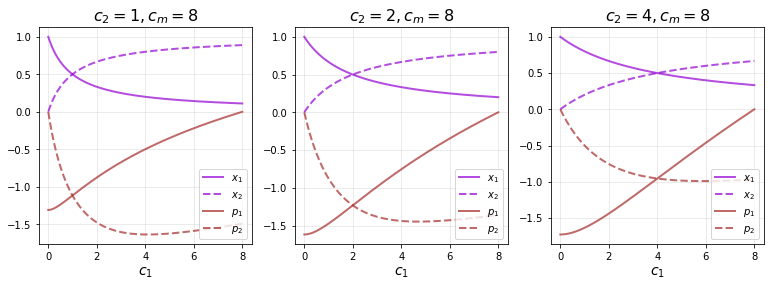

In [132]:
f, axarr = plt.subplots(ncols=3, figsize=(13,4))

for i in range(3):
    axarr[i].plot(c1s, allos[i], color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_1$')
    axarr[i].plot(c1s, 1-allos[i], color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_2$', 
                  linestyle='--')
    axarr[i].plot(c1s, payments[i], color='brown', linewidth=2, alpha=0.7, label=r'$p_1$')
    axarr[i].plot(c1s, payments2[i], color='brown', linewidth=2, alpha=0.7, label=r'$p_2$',
                  linestyle='--')
    
for ax in axarr:
    ax.legend(loc=4)
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$c_1$', size=14)

axarr[0].set_title(r'$c_2=1, c_m=8$', size=16)
axarr[1].set_title(r'$c_2=2, c_m=8$', size=16)
axarr[2].set_title(r'$c_2=4, c_m=8$', size=16)
plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')

plt.show()

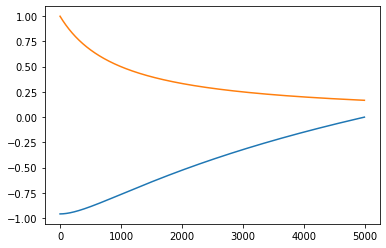

In [83]:
plt.plot(pays1)
plt.plot(allos1)

In [20]:
expr1

1/(z*(1/z + 1/c2))

In [14]:
expr2 = z/(z+b1)
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*diff2, (z, 0, b2))
utility2 = sp.simplify(v2*(b2/(b1+b2)) - pay2)
utility2

(b1*(b1 + b2)*(log(b1) + 1) - b1*(b1 + (b1 + b2)*log(b1 + b2)) + b2*v2)/(b1 + b2)

In [15]:
foc1 = sp.Eq(sp.diff(utility1, b1), 0)
foc2 = sp.Eq(sp.diff(utility2, b2), 0)
sol = sp.solve((foc1, foc2), (b1, b2), dict=True)
sol

[{b1: v1, b2: v2}]

In [10]:
b1 = sp.Symbol('b1')
f1 = sp.Function('f1')
b2 = sp.Symbol('b2')
f2 = sp.Function('f2')
v1, v2 = sp.symbols('v1 v2')

u1 = v1 * f1(b1) / (f1(b1) + f2(b2)) - b1
u2 = v2 * f2(b2) / (f1(b1) + f2(b2)) - b2

In [12]:
u2

-b2 + v2*f2(b2)/(f1(b1) + f2(b2))

In [21]:
sp.simplify(sp.diff(u1, b1))

v1*f2(b2)*Derivative(f1(b1), b1)/(f1(b1) + f2(b2))**2 - 1

In [19]:
foc1 = sp.Eq(sp.diff(u1, b1), 0)
foc2 = sp.Eq(sp.diff(u2, b2), 0)
foc1

Eq(v1*Derivative(f1(b1), b1)/(f1(b1) + f2(b2)) - v1*f1(b1)*Derivative(f1(b1), b1)/(f1(b1) + f2(b2))**2 - 1, 0)

In [20]:
sol = sp.solve((foc1, foc2), (b1, b2), dict=True)

NotImplementedError: could not solve _Dummy_36*v2*(f1(b1) + f2(b2))**2 - _Dummy_36*v2*(f1(b1) + f2(b2))*f2(b2) - (f1(b1) + f2(b2))**3